In [1]:
from src.utils.load_data import load_data
from src.utils.config_setup import load_config

import json

2024-07-08 11:25:42,272 | INFO : Log opened: Mon Jul  8 09:25:42 2024 UTC
2024-07-08 11:25:42,346 | INFO : topicmanager initialized


In [2]:
config_path = '/home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/configuration.json'

In [3]:
import logging

logging.basicConfig(
    format="%(asctime)s | %(levelname)s : %(message)s", level=logging.INFO
)
logger = logging.getLogger(__name__)

In [4]:
def load_config(config_filepath):
    """
    Using a json file with the master configuration (config file for each part of the pipeline),
    return a dictionary containing the entire configuration settings in a hierarchical fashion.
    """

    with open(config_filepath) as cnfg:
        config = json.load(cnfg)
        
    return config


In [5]:
config = load_config(config_path)

In [6]:
## Build and split data
train_loader, val_loader, data = load_data(config, logger)

2024-07-08 11:25:48,279 | INFO : Loading and preprocessing data ...
2024-07-08 11:25:48,284 | INFO : Loading 24 datasets files using 8 parallel processes ...
2024-07-08 11:25:49,988 | INFO : 8758 samples may be used for training
2024-07-08 11:25:49,990 | INFO : 2190 samples will be used for validation


In [7]:
config['data_dir'] = '/home/sam/Desktop/Pedestrian_Project/Ped_smoothed_tracks_original.csv'
config['data_class'] = 'svea'

In [8]:
from src.transformer_model.model import create_model

device = 'cpu'

# Create model
model, optimizer, trainer, val_evaluator, start_epoch = create_model(
    config, train_loader, val_loader, data, logger, device
)

/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-08 11:25:54,160	INFO util.py:187 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-08 11:25:54,289	INFO util.py:187 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-07-08 11:25:54,

In [9]:
from src.transformer_model.model import train

session = None

config['epochs'] = 1

# Train Model
aggr_metrics_val, best_metrics, best_value = train(
    model,
    optimizer,
    start_epoch,
    trainer,
    val_evaluator,
    train_loader,
    val_loader,
    config,
    session,
)

2024-07-03 11:17:57,818 | INFO : Evaluating on validation set ...


Evaluating Epoch 0   0.0% | batch:         0 of         9	|	loss: 1357.24
Evaluating Epoch 0  11.1% | batch:         1 of         9	|	loss: 1323.47
Evaluating Epoch 0  22.2% | batch:         2 of         9	|	loss: 1286.28
Evaluating Epoch 0  33.3% | batch:         3 of         9	|	loss: 1217.43
Evaluating Epoch 0  44.4% | batch:         4 of         9	|	loss: 1426.41
Evaluating Epoch 0  55.6% | batch:         5 of         9	|	loss: 1378.94
Evaluating Epoch 0  66.7% | batch:         6 of         9	|	loss: 1453.06


2024-07-03 11:18:00,886 | INFO : Validation runtime: 0.0 hours, 0.0 minutes, 3.06754732131958 seconds

2024-07-03 11:18:00,888 | INFO : Avg val. time: 0.0 hours, 0.0 minutes, 3.06754732131958 seconds
2024-07-03 11:18:00,889 | INFO : Avg batch val. time: 0.34083859125773114 seconds
2024-07-03 11:18:00,890 | INFO : Avg sample val. time: 0.0014007065394153334 seconds
2024-07-03 11:18:00,891 | INFO : Epoch 0 Validation Summary: epoch: 0.000000 | loss: 1355.458163 | 


Evaluating Epoch 0  77.8% | batch:         7 of         9	|	loss: 1301.12
Evaluating Epoch 0  88.9% | batch:         8 of         9	|	loss: 1547.51


Training Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Training Epoch 1   0.0% | batch:         0 of        35	|	loss: 114.305
Training Epoch 1   2.9% | batch:         1 of        35	|	loss: 123.959
Training Epoch 1   5.7% | batch:         2 of        35	|	loss: 119.076
Training Epoch 1   8.6% | batch:         3 of        35	|	loss: 121.388
Training Epoch 1  11.4% | batch:         4 of        35	|	loss: 112.821
Training Epoch 1  14.3% | batch:         5 of        35	|	loss: 126.424
Training Epoch 1  17.1% | batch:         6 of        35	|	loss: 126.538
Training Epoch 1  20.0% | batch:         7 of        35	|	loss: 109.47
Training Epoch 1  22.9% | batch:         8 of        35	|	loss: 115.464
Training Epoch 1  25.7% | batch:         9 of        35	|	loss: 117.685
Training Epoch 1  28.6% | batch:        10 of        35	|	loss: 108.656
Training Epoch 1  31.4% | batch:        11 of        35	|	loss: 105.864
Training Epoch 1  34.3% | batch:        12 of        35	|	loss: 114.024
Training Epoch 1  37.1% | batch:        13 of        35	|	loss: 1

2024-07-03 11:18:30,586 | INFO : Epoch 1 Training Summary: epoch: 1.000000 | loss: 109.531944 | 
2024-07-03 11:18:30,587 | INFO : Epoch runtime: 0.0 hours, 0.0 minutes, 29.678004264831543 seconds

2024-07-03 11:18:30,587 | INFO : Avg epoch train. time: 0.0 hours, 0.0 minutes, 29.678004264831543 seconds
2024-07-03 11:18:30,588 | INFO : Avg batch train. time: 0.8479429789951869 seconds
2024-07-03 11:18:30,589 | INFO : Evaluating on validation set ...


Training Epoch 1  94.3% | batch:        33 of        35	|	loss: 105.526
Training Epoch 1  97.1% | batch:        34 of        35	|	loss: 104.332
Evaluating Epoch 1   0.0% | batch:         0 of         9	|	loss: 94.7574
Evaluating Epoch 1  11.1% | batch:         1 of         9	|	loss: 89.4843
Evaluating Epoch 1  22.2% | batch:         2 of         9	|	loss: 90.6252
Evaluating Epoch 1  33.3% | batch:         3 of         9	|	loss: 85.905
Evaluating Epoch 1  44.4% | batch:         4 of         9	|	loss: 100.751
Evaluating Epoch 1  55.6% | batch:         5 of         9	|	loss: 95.8492
Evaluating Epoch 1  66.7% | batch:         6 of         9	|	loss: 100.175


2024-07-03 11:18:33,494 | INFO : Validation runtime: 0.0 hours, 0.0 minutes, 2.904674768447876 seconds

2024-07-03 11:18:33,495 | INFO : Avg val. time: 0.0 hours, 0.0 minutes, 2.986111044883728 seconds
2024-07-03 11:18:33,495 | INFO : Avg batch val. time: 0.331790116098192 seconds
2024-07-03 11:18:33,496 | INFO : Avg sample val. time: 0.001363521025061063 seconds
2024-07-03 11:18:33,497 | INFO : Epoch 1 Validation Summary: epoch: 1.000000 | loss: 94.642955 | 


Evaluating Epoch 1  77.8% | batch:         7 of         9	|	loss: 94.1895
Evaluating Epoch 1  88.9% | batch:         8 of         9	|	loss: 105.197


2024-07-03 11:18:33,574 | INFO : Learning rate updated to: 0.0005011190688592435


# Clustering Phase

In [10]:
import os

ROOT = os.getcwd()

In [11]:
ROOT

'/home/sam/Desktop/Pedestrian_Project'

In [12]:
folder='experiments'
model_file='SINDDataset_pretrained_2024-04-27_00-11-45_KIP'
index=2
index_data=0
original_data=False

In [13]:
config['save_dir']

'./experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints'

In [14]:
config = load_config(config_path)
config

{'activation': 'relu',
 'batch_size': 256,
 'comment': 'pretraining through imputation',
 'config_filepath': None,
 'console': False,
 'data_chunk_len': 50,
 'data_class': 'sind',
 'data_dir': 'resources/SinD/Data',
 'data_normalization': 'none',
 'dropout': 0.0,
 'early_stopping_delta': 0.0,
 'early_stopping_patience': 10,
 'embedding_dim': 128,
 'epochs': 1000,
 'eval_only': False,
 'exclude_feats': None,
 'experiment_name': 'SINDDataset_pretrained',
 'harden': True,
 'harden_step': 10,
 'hidden_dim': 512,
 'hyperparameter_tuning': False,
 'initial_timestamp': '2024-04-27_00-11-45',
 'l2_reg': 0.05,
 'load_model': None,
 'lr': 0.0005011190688592435,
 'lr_decay': 1.0,
 'lr_step': 1,
 'mask_distribution': 'bernoulli',
 'mask_mode': 'concurrent',
 'masking_ratio': 0.1,
 'max_grad_norm': 4.0,
 'mean_mask_length': 3,
 'n_proc': -1,
 'no_cuda': False,
 'normalization_layer': 'BatchNorm',
 'num_heads': 8,
 'num_layers': 3,
 'num_workers': 0,
 'optimizer': 'Adam',
 'output_dir': './experimen

In [15]:
config = load_config(config_path)

config['data_class'] = 'svea'
config['epochs'] = 1

config['save_dir'] = ROOT + f'/{folder}/' + config['save_dir'].split('/', index)[-1]
config['output_dir'] = ROOT + f'/{folder}/' + config['output_dir'].split('/', index)[-1]  + '/eval'
config['tensorboard_dir'] = ROOT + f'/{folder}/' + config['tensorboard_dir'].split('/', index)[-1] + '/eval'
config['data_dir'] = ROOT + '/' + config['data_dir'].split('/', index_data)[-1]
config['load_model'] = config['save_dir'] +'/model_best.pth'
config['eval_only'] = True
config['save_embeddings'] = True
config['val_ratio'] = 1.0
config['dropout'] = 0.0  # No dropout during evaluation
config['hyperparameter_tuning'] = False

In [16]:
config

{'activation': 'relu',
 'batch_size': 256,
 'comment': 'pretraining through imputation',
 'config_filepath': None,
 'console': False,
 'data_chunk_len': 50,
 'data_class': 'svea',
 'data_dir': '/home/sam/Desktop/Pedestrian_Project/resources/SinD/Data',
 'data_normalization': 'none',
 'dropout': 0.0,
 'early_stopping_delta': 0.0,
 'early_stopping_patience': 10,
 'embedding_dim': 128,
 'epochs': 1,
 'eval_only': True,
 'exclude_feats': None,
 'experiment_name': 'SINDDataset_pretrained',
 'harden': True,
 'harden_step': 10,
 'hidden_dim': 512,
 'hyperparameter_tuning': False,
 'initial_timestamp': '2024-04-27_00-11-45',
 'l2_reg': 0.05,
 'load_model': '/home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints/model_best.pth',
 'lr': 0.0005011190688592435,
 'lr_decay': 1.0,
 'lr_step': 1,
 'mask_distribution': 'bernoulli',
 'mask_mode': 'concurrent',
 'masking_ratio': 0.1,
 'max_grad_norm': 4.0,
 'mean_mask_length': 3,
 'n_proc': -1,
 'no_c

In [17]:
from main import run

run(config)

2024-07-03 11:18:33,685 | INFO : Running:
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/ipykernel_launcher.py --f=/home/sam/.local/share/jupyter/runtime/kernel-v2-553107KJmT24vlLLzT.json

2024-07-03 11:18:33,687 | INFO : Using device: cpu
2024-07-03 11:18:33,688 | INFO : Loading and preprocessing data ...
2024-07-03 11:18:33,692 | INFO : Loading 24 datasets files using 8 parallel processes ...
2024-07-03 11:18:35,517 | INFO : 10948 samples may be used for evaluation
2024-07-03 11:18:35,518 | INFO : 0 samples may be used for training
2024-07-03 11:18:35,519 | INFO : 10948 samples will be used for validation
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}

Loaded model from /home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints/model_best.pth. Epoch: 1
Evaluating   0.0% | batch:         0 of        43	|	loss: 82.0291
Evaluating   2.3% | batch:         1 of        43	|	loss: 106.272
Evaluating   4.7% | batch:         2 of        43	|	loss: 90.7703
Evaluating   7.0% | batch:         3 of        43	|	loss: 74.3201
Evaluating   9.3% | batch:         4 of        43	|	loss: 73.039
Evaluating  11.6% | batch:         5 of        43	|	loss: 73.2878
Evaluating  14.0% | batch:         6 of        43	|	loss: 82.5727
Evaluating  16.3% | batch:         7 of        43	|	loss: 82.1846
Evaluating  18.6% | batch:         8 of        43	|	loss: 80.0488
Evaluating  20.9% | batch:         9 of        43	|	loss: 97.1466
Evaluating  23.3% | batch:        10 of        43	|	loss: 85.6716
Evaluating  25.6% | batch:        11 of        43	|	loss: 140.913
Evaluating  27.9% | batch:        12 of        43	|	loss: 

2024-07-03 11:18:54,813 | INFO : Evaluation Summary: loss: 94.325002 | 
2024-07-03 11:18:54,815 | INFO : Evaluation runtime: 0.0 hours, 0.0 minutes, 12.752222299575806 seconds



In [18]:
import torch
import numpy as np


def get_original_data(config: dict):
    '''
    Load the original data when the data are normalized
    '''
    original_pt_file = torch.load(f"{config['output_dir']}/original_data.pt") # chunk 50, batch size 16, with original data
    chunk_size = config["data_chunk_len"]

    result = []
    feature_names = ["x", "y", "vx", "vy", "ax", "ay"]
    padding_indicators = []

    for key, group in original_pt_file['val_data'].groupby('data_chunk_len'):
        # For each group, convert it into a 2D list (where each sublist is a row in the group)
        chunks = group[feature_names].to_numpy()
        pad_length = chunk_size - chunks.shape[0]
        padded_chunks = np.pad(
            chunks,
            ((0, pad_length), (0, 0)),
            mode="constant",
            constant_values=0,
        )

        # Create an indicator array for padding
        # 0s for original data, 1s for padded data
        indicator_arr = np.zeros((chunks.shape[0], 1) , dtype=int)  # Initialize with zeros, indicating original data

        if pad_length > 0:
            # Create padding indicators (1s) and append to the original indicator array
            padding_indicator = np.ones((pad_length, 1), dtype=int)
            indicator_arr = np.vstack((indicator_arr, padding_indicator))
        
        padding_indicators.append(indicator_arr[:, 0])
        result.append(padded_chunks)

    return np.array(result), np.array(padding_indicators)


def load_data(config: dict):
    # Load the data
    pt_file = torch.load(f"{config['output_dir']}/output_data.pt")
    all_data_original, _ = get_original_data(config)

    all_data = np.concatenate(pt_file['targets'], axis=0)
    all_embeddings = np.concatenate(pt_file['embeddings'], axis=0)
    all_embeddings_original = np.concatenate(pt_file['embeddings_original'], axis=0)
    all_predictions = np.concatenate(pt_file['predictions'], axis=0)

    padding_masks = np.concatenate(pt_file['padding_masks'], axis=0)
    target_masks = np.concatenate(pt_file['target_masks'], axis=0)

    return all_data_original, all_data, all_embeddings, all_embeddings_original, all_predictions, padding_masks, target_masks


all_data_original, all_data, all_embeddings, all_embeddings_original, all_predictions, padding_masks, target_masks = load_data(config)

In [19]:
all_data_original.shape, all_data.shape, all_embeddings_original.shape, all_predictions.shape, padding_masks.shape, target_masks.shape

((10948, 50, 6),
 (10948, 50, 6),
 (10948, 50, 128),
 (10948, 50, 6),
 (10948, 50),
 (10948, 50, 6))

In [20]:
config["original_data"] = False
config["remove_noise"] = True

Cluster assignments: 5
Silhouette Score: -0.2576731741428375, num_clusters: 4


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


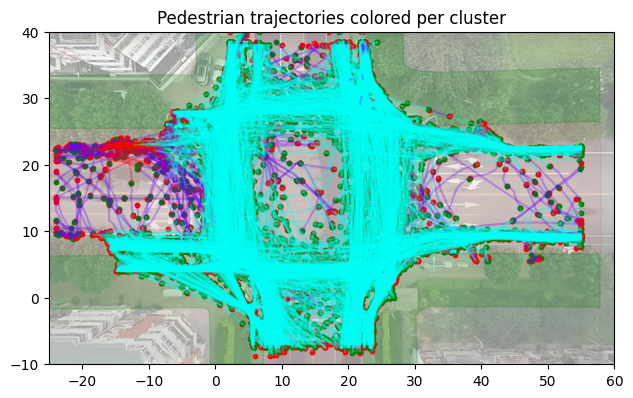

Load data from: /home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters


In [21]:
from src.clustering.run import run_clusters

config["original_data"] = False
config["remove_noise"] = True


run_clusters(config=config, load_embeddings=True, load_clusters=False)

In [22]:
cluster_path = '/home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters/cluster_labels.pkl'

import pickle


with open(cluster_path, 'rb') as f:
    data = pickle.load(f)

In [23]:
np.unique(data), data.shape

(array([-1,  0,  1,  2,  3]), (10948,))

# Reachability Analysis

In [24]:
from src.reachability_analysis.simulation import get_test_config

ROOT_RESOURCES = os.getcwd() + "/resources"
test_name = 'cross_illegal_8_11_1'

config['original_data'] = False

test_labeling_oracle, config_test = get_test_config(config, test_name=test_name)

/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/operations.py:23: UserWarning: You don't have pydrake installed properly. Methods that rely on optimization may fail.
  warnings.warn("You don't have pydrake installed properly. Methods that rely on optimization may fail.")
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/conversions.py:19: UserWarning: WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.
  warnings.warn("WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.")
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/conversions.py:32: UserWarning: You don't have pydrake installed properly. Methods that rely on optimization may fail.
  warnings.warn("You don't have pydrake installed properly. Methods that rely on optimization may fail.")
/home/sam/Desktop/P

In [25]:
from src.reachability_analysis.simulation import get_test_label

trajectory, l = get_test_label(test_labeling_oracle)


Labeling data: 100%|██████████| 3/3 [00:00<00:00, 2118.69it/s]


In [26]:
trajectory.shape

(3, 50, 6)

In [27]:
from src.reachability_analysis.simulation import get_cluster

c = get_cluster(config, data_oracle=test_labeling_oracle)

/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-07-03 11:21:54,042 | INFO : Model:
TSTransformerEncoder(
  (project_inp): Linear(in_features=6, out_features=128, bias=True)
  (pos_enc): LearnablePositionalEncoding(
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerBatchNormEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Li

Loaded model from /home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints/model_best.pth. Epoch: 1
Evaluating   0.0% | batch:         0 of         1	|	loss: 23.6441
Load data from: /home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters
Load Annoy Model from: /home/sam/Desktop/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters/annoy_index.ann


In [28]:
c

2

In [29]:
test_cases = {f'c_{c}': f'Cluster: {c}'}
test_cases

{'c_2': 'Cluster: 2'}

In [30]:
from src.reachability_analysis.simulation import get_initial_conditions

pos, v = get_initial_conditions(trajectory)

In [31]:
pos, v

(array([-13.04118909,   8.54022801]), array([ 0.77133718, -0.07469204]))

2024-07-03 11:21:54,399 | INFO : Loading 24 datasets files using 8 parallel processes ...


(2, 'Cluster: 2') 250 (540, 50, 6) (540,)


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
Calculating reachable sets: 100%|██████████| 48/48 [00:22<00:00,  2.10it/s]


Area of zonotope:  495.7525  m^2


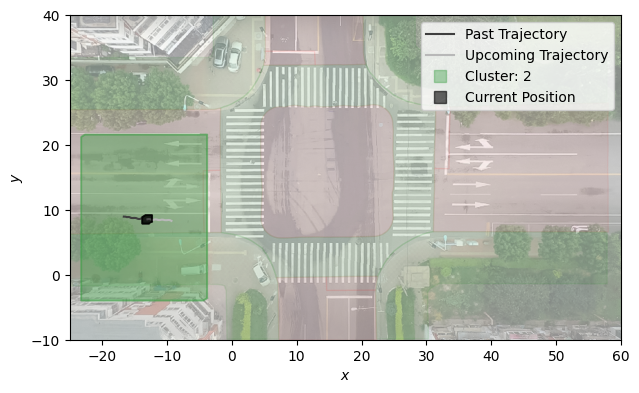

In [32]:
from src.reachability_analysis.simulation import reachability_for_all_modes

z, l, _b, _z = reachability_for_all_modes(pos=pos, vel=v, baseline=False, test_cases=test_cases, config=config, trajectory=trajectory, show_plot=True, save_plot=None)

In [36]:
z, l, _b, _z

([zonotope, zonotope],
 ['Cluster: 2', 'Current Position'],
 [],
 {'Cluster: 2': [zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope,
   zonotope],
  'baselines': None})

In [39]:
len(_z['Cluster: 2'])

49

In [44]:
z[0] == _z['Cluster: 2'][-1]

True

In [40]:
l

['Cluster: 2', 'Current Position']

In [49]:
output = z[0]

In [53]:
output.x

array([[-13.49767034],
       [  8.82269617]])

In [57]:
import bagpy
from bagpy import bagreader

b = bagreader('/home/sam/Desktop/Pedestrian_Project/ismir_data_2024-06-28-11-56-17.bag')
# Get list of topics
print(b.topic_table)

# Read a specific topic into a pandas dataframe
data = b.message_by_topic('/your_topic')


2024-07-03 11:59:33,788 | INFO : Log opened: Wed Jul  3 09:59:33 2024 UTC
2024-07-03 11:59:33,828 | INFO : topicmanager initialized


[INFO]  Successfully created the data folder /home/sam/Desktop/Pedestrian_Project/ismir_data_2024-06-28-11-56-17.
                                               Topics  \
0                                         /bbox_image   
1                         /detection_splitter/persons   
2                                       /gps/filtered   
3                                            /gps/fix   
4                                 /gps/heading_motion   
5                                          /gps/speed   
6                                           /imu/data   
7                                      /objectmarkers   
8                                        /objectposes   
9                                            /objects   
10                  /pedestrian_flow_estimate/float_1   
11                  /pedestrian_flow_estimate/float_2   
12  /pedestrian_flow_estimate/pedestrian_flow_esti...   
13                                             /state   
14                             